In [1]:
from koala.pointsets import uniform
from koala import graph_utils as gu
from koala import plotting as pl
from koala.voronization import generate_lattice

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

<Axes: >

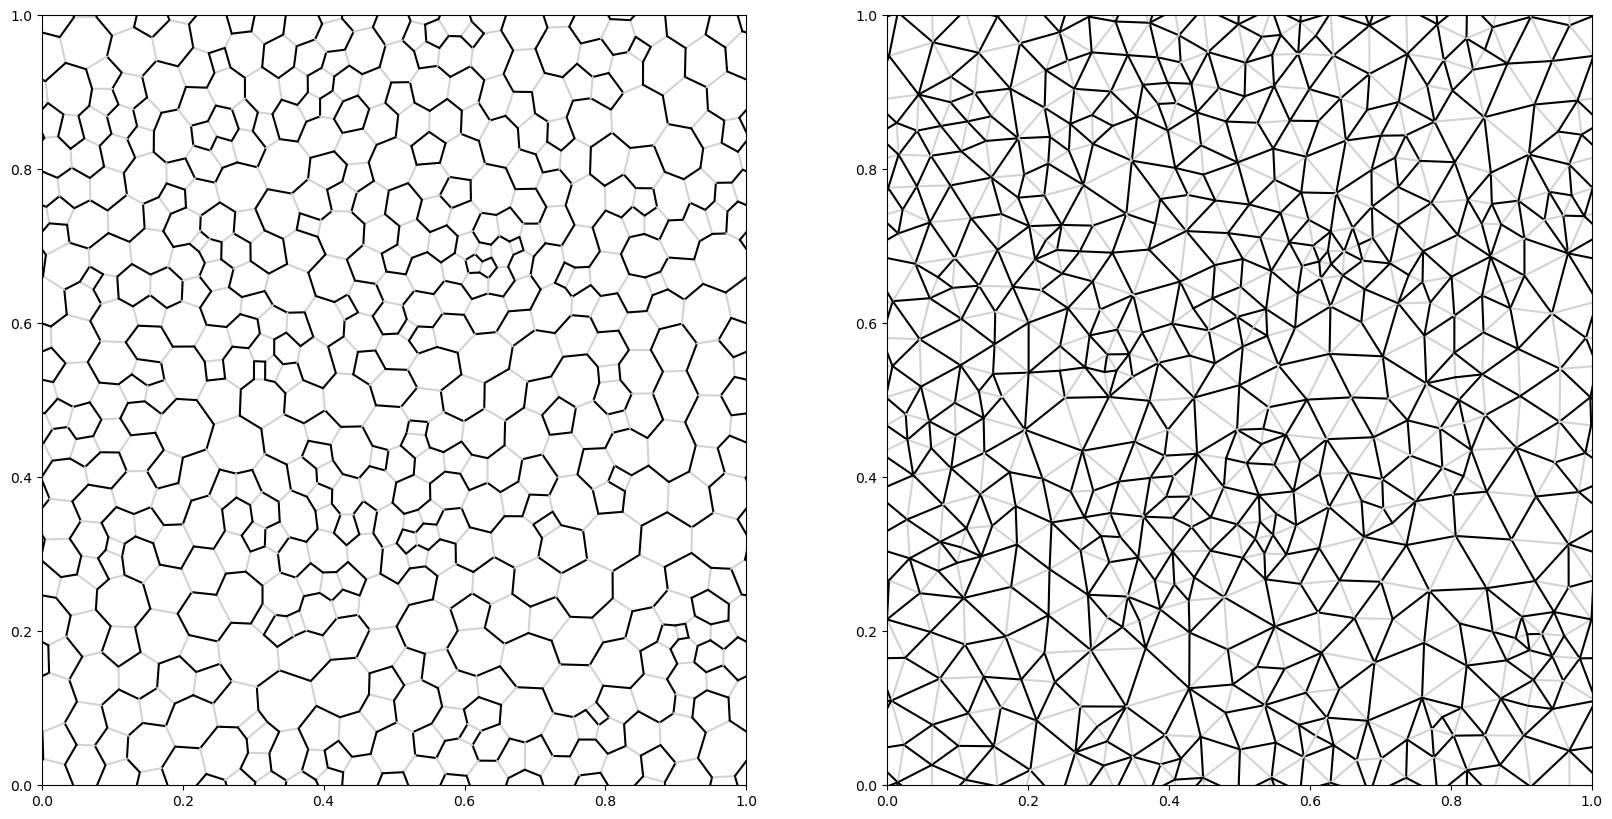

In [2]:
lattice = generate_lattice(uniform(500))
# lattice = gu.lloyd_relaxation(lattice, 10)
dual = gu.make_dual(lattice)
dimerisation = gu.dimerise(lattice)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
pl.plot_edges(lattice, dimerisation, ["k", "lightgrey"], ax=ax[0])
pl.plot_edges(dual, dimerisation, ["k", "lightgrey"], ax=ax[1])

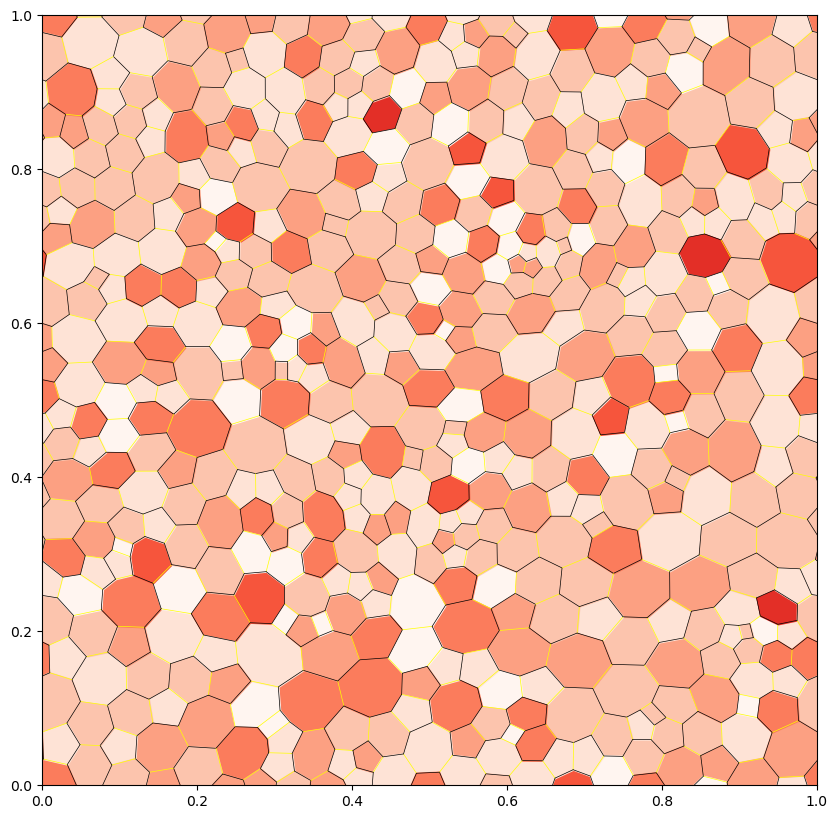

In [3]:
plaquette_scores = [np.sum(1 - 2 * dimerisation[p.edges]) for p in lattice.plaquettes]
plaquette_scores = np.array(plaquette_scores) / 2
cmap = mpl.colormaps["Reds"]

# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 10))


fig, ax = plt.subplots(1, 1, figsize=(10, 10))
pl.plot_plaquettes(lattice, plaquette_scores * 2, colors, ax=ax)
pl.plot_edges(lattice, dimerisation, ["k", "yellow"], ax=ax, linewidth=0.5)

for i in range(lattice.n_plaquettes):
    x, y = lattice.plaquettes[i].center
    plt.annotate(plaquette_scores[i], (x, y), ha="center", va="center")


plt.show()
# print(np.sum(plaquette_scores), lattice.n_vertices, lattice.n_edges)